In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
data2 = pd.read_csv("C:/Users/ADMIN/Desktop/Customer_segmentation/Lift_Analysis/customers.csv")

FileNotFoundError: File b'C:/Users/ADMIN/Desktop/Customer_segmentation/Lift_Analysis/customers.csv' does not exist

In [22]:
data2.head(2)

,SI,Customer_ID,Age,Gender,City,Frequent_Buyer_Milk,Income Group,Response
0,1,17850,14,Male,Texas,Yes,Medium,No
1,2,13047,39,Male,Houston,No,Medium,No


In [71]:
data.rename(columns = {'Respone':'Response'}, inplace = True)

In [23]:
le11 = LabelEncoder()
data2['Gender'] = le11.fit_transform(data2['Gender'])
le21 = LabelEncoder()
data2['City'] = le21.fit_transform(data2['City'])
le31 = LabelEncoder()
data2['Frequent_Buyer_Milk'] = le31.fit_transform(data2['Frequent_Buyer_Milk'])
le41 = LabelEncoder()
data2['Income Group'] = le41.fit_transform(data2['Income Group'])
le51 = LabelEncoder()
data2['Response'] = le51.fit_transform(data2['Response'])

In [73]:
data.head(2)

,SI,Customer_ID,Age,Gender,City,Frequent_Buyer_Milk,Income Group,Response
0,1,17850,14,1,2,1,2,0
1,2,13047,39,1,1,0,2,0


In [74]:
data.dtypes

SI                     int64
Customer_ID            int64
Age                    int64
Gender                 int64
City                   int64
Frequent_Buyer_Milk    int64
Income Group           int64
Response               int64
dtype: object

# Naive Bayes Model forpredicting the probabilities

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [24]:
X1 = data2[['Customer_ID','Age','Gender','City','Frequent_Buyer_Milk','Income Group']]
y1 = data2['Response']

In [37]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

In [38]:
nb = GaussianNB()

In [39]:
nb.fit(X1_train,y1_train)

GaussianNB(priors=None)

In [40]:
predict1_probas = nb.predict_proba(X1_test)

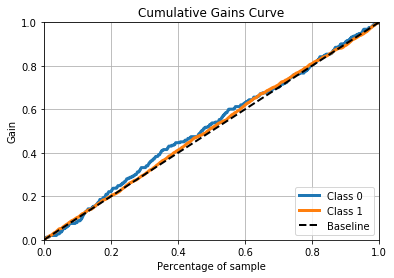

In [41]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y1_test, predict1_probas)
plt.show()

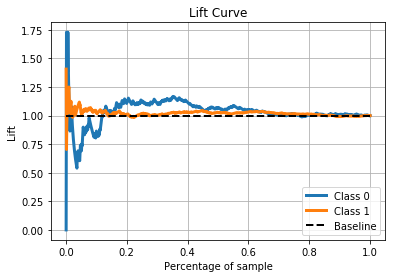

In [42]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y1_test, predict1_probas)
plt.show()

In [88]:
predict_probas

array([[0.28612008, 0.71387992],
       [0.24641368, 0.75358632],
       [0.28148166, 0.71851834],
       ...,
       [0.24932974, 0.75067026],
       [0.29610053, 0.70389947],
       [0.2513245 , 0.7486755 ]])

# Lift Analysis on Newly downloaded dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("C:/Users/ADMIN/Desktop/Customer_segmentation/Lift_Analysis/WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS.csv")

In [4]:
data.shape

(1496, 15)

In [5]:
stacked = data[['StoreSize']].stack()
data[['StoreSize']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()


In [6]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
data['HealthyStore'] = le1.fit_transform(data['HealthyStore'])
le2 = LabelEncoder()
data['StoreLayout'] = le2.fit_transform(data['StoreLayout'])
le3 = LabelEncoder()
data['gender'] = le3.fit_transform(data['gender'])
le4 = LabelEncoder()
data['WhoShoppingFor'] = le4.fit_transform(data['WhoShoppingFor'])
le5 = LabelEncoder()
data['Vegetarian'] = le5.fit_transform(data['Vegetarian'])
le6 = LabelEncoder()
data['ShoppingStyle'] = le6.fit_transform(data['ShoppingStyle'])
#le7 = LabelEncoder()
#data['CouponUser'] = le7.fit_transform(data['CouponUser'])

In [7]:
temp2 = data.customerID.str.split('-')
a = temp2.str[-2]
data['a'] = a

In [8]:

data.head(2)

#data.dtypes
#data['customerID'] = data['customerID'].astype('str')
#data['customerID'] = data['customerID'].str.replace('-', '')
#data['customerID'] = pd.to_numeric(data['customerID'])
#r'\d+'
#temp2.str[-1] = temp2.str[-1].astype('str')
#b = pd.to_numeric(b)

,storeid,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent,a
0,1,1,0,3,6193-QDKCN,1,2,0,1,From newspaper,1,"2,4,1,3",0,05 percent,135.24,6193
1,1,1,0,3,6193-QDKCN,1,2,0,1,From newspaper,2,"2,4,1,3",2,25 percent,128.65,6193


In [9]:
data['Response'] = np.where(data['CouponUser']=='No', 0,1)

In [10]:
data.head(2)

,storeid,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent,a,Response
0,1,1,0,3,6193-QDKCN,1,2,0,1,From newspaper,1,"2,4,1,3",0,05 percent,135.24,6193,1
1,1,1,0,3,6193-QDKCN,1,2,0,1,From newspaper,2,"2,4,1,3",2,25 percent,128.65,6193,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = data[['HealthyStore','StoreSize','StoreLayout','a','gender','WhoShoppingFor','Vegetarian','ShoppingStyle','week','CarryOver','AmountSpent']]
y = data['Response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
nb = GaussianNB()
nb.fit(X_train,y_train)
predict_probas = nb.predict_proba(X_test)

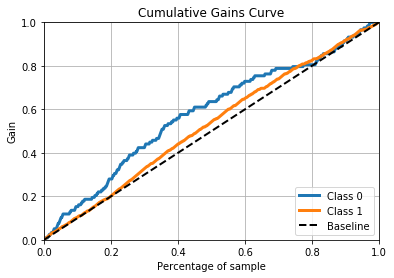

In [16]:
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline
skplt.metrics.plot_cumulative_gain(y_test, predict_probas)
plt.show()

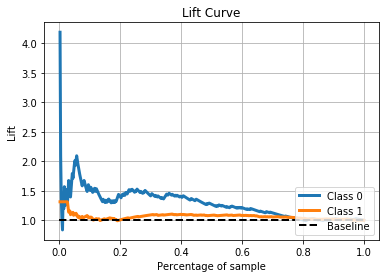

In [17]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predict_probas)
plt.show()

Lift Curve: Using the predictions of the response model, calculate the percentage of positive responses for the percent of customers contacted and map these points to create the lift curve.

In [69]:
df = pd.DataFrame(data=predict_probas[0:,0:],columns = ("zero","one"))
#df['new'] = np.where(df[0]>df[1], 0, 1)

In [70]:
df.head(2)

,zero,one
0,0.431257,0.568743
1,0.402744,0.597256


In [18]:
predict_probas1 = nb.predict_proba(X_train)
df1 = pd.DataFrame(data=predict_probas1[0:,0:])
df1['new'] = np.where(df1[0]>df1[1], 0, 1)

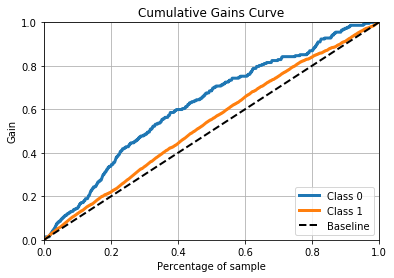

In [19]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_train, predict_probas1)
plt.show()

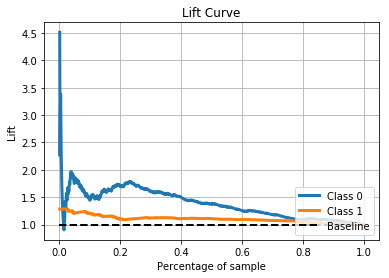

In [20]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_train, predict_probas1)
plt.show()

In [76]:
df_all = X_test

In [77]:
df_all['actual_response'] = y_test

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_all['Predicted_response'] = df["zero"]


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
df_all['Predicted_response_1'] = df["one"]


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_all.head(10)

,HealthyStore,StoreSize,StoreLayout,a,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,week,CarryOver,AmountSpent,actual_response,Predicted_response,Predicted_response_1
848,1,0,1,8542,0,0,0,2,1,0,108.63,1,NaN,NaN
872,0,2,3,0745,1,0,0,1,1,0,110.61,1,NaN,NaN
920,1,1,2,3930,0,0,0,1,1,0,107.99,1,NaN,NaN
1213,1,0,3,9285,1,0,1,0,2,4,140.57,0,NaN,NaN
253,1,1,3,3547,1,1,0,1,2,3,173.05,1,0.033452,0.966548
51,1,1,1,0861,1,2,0,0,4,1,192.52,1,0.589025,0.410975
228,1,1,3,7380,0,1,0,2,1,0,215.57,1,0.257756,0.742244
572,1,0,0,2093,0,0,0,0,1,0,188.32,1,NaN,NaN
845,1,0,1,9798,0,2,0,2,2,2,132.25,0,NaN,NaN
483,1,2,2,0427,0,2,0,2,4,4,120.20,1,0.254420,0.745580
